# **Moniqo Group Project**

### **Data Cleaning** 



***Data description:*** entire journey of a microfinance customer 
- **LoanId**                            (int64):        Unique identifier for each loan
- **AmountDisbursed**                   (int64):        Amount actually released to the borrower
- **Interest**                          (int64)
- **LoanBalance**                     (float64):        Remaining outstanding principal+ interest(current) tiền gốc còn nợ&lãi
- **BorrowDate**                       (object):        Date the loan was borrowed 
- **Product**                          (object):        Loan product type/category (5-7-10 weeks credit ease)
- **Branch**                           (object):        Branch/service point managing the loan
- **ClearDate**                        (object):        Scheduled date for the borrower to complete repayment
- **CustomerId**                        (int64)        
- **Gender**                           (object)
- **LoanLimit**                         (int64):        The maximum loan amount the customer is currently eligible for
- **CreditScore**                       (int64):        A numerical score representing the estimated risk of lending to the customer (higher score = better creditworthiness)
- **loan_repayment_txn_count**          (int64):        Number of loan repayment transactions made by borrower 
- **loan_repayment_total_paid**         (int64):        Total amount of money paid toward the loan so far (may include principal and interest)
- **loan_repayment_first_payment**     (object):        Date when the borrower made their first loan repayment
- **loan_repayment_last_payment**      (object):        Date of the most recent loan payment 
- **loan_overpayment**                  (int64):        Amount paid in excess of the required repayment 
- **missed_instalments**              (float64):        Number of repayment installments that were missed or paid late
- **Industry**                         (object):        The economic sector in which the customers' business operates
- **Business Type**                    (object):        Specific type of customers' business activity within the industry
- **Year of Establishment**            (int64):        Year in which the business was founded

# 1. Imports & Reading data

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA 
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

ModuleNotFoundError: No module named 'numpy'

In [58]:
# Load the main dataset 
df = pd.read_csv('repeat_loans_final.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment
0,951920,6000,1750,7750.0,11/29/2025,5 WEEKS CREDIT EASE,ENGINEER,1/3/2026,1819,FEMALE,...,3500,1,500,29/11/2025,29/11/2025,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,11/28/2025,5 WEEKS CREDIT EASE,MOLO,1/2/2026,1818,FEMALE,...,2500,1,1550,28/11/2025,28/11/2025,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,11/26/2025,5 WEEKS CREDIT EASE,ENGINEER,31/12/2025,1815,FEMALE,...,3500,1,1350,26/11/2025,26/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,11/25/2025,5 WEEKS CREDIT EASE,MOLO,30/12/2025,1814,FEMALE,...,1500,1,1000,25/11/2025,25/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,11/24/2025,5 WEEKS CREDIT EASE,MOLO,29/12/2025,1813,FEMALE,...,1500,1,1550,24/11/2025,24/11/2025,0,4.0,Business & Information,Bureau & Publishing Services,2018


# 2. Loading and Initial Exploration

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanId                        3572 non-null   int64  
 1   AmountDisbursed               3572 non-null   int64  
 2   Interest                      3572 non-null   int64  
 3   LoanBalance                   3572 non-null   float64
 4   BorrowDate                    3572 non-null   object 
 5   Product                       3572 non-null   object 
 6   Branch                        3572 non-null   object 
 7   ClearDate                     3572 non-null   object 
 8   CustomerId                    3572 non-null   int64  
 9   Gender                        3572 non-null   object 
 10  LoanLimit                     3572 non-null   int64  
 11  CreditScore                   3572 non-null   int64  
 12  loan_repayment_txn_count      3572 non-null   int64  
 13  loa

In [60]:
# Use df.describe() to get descriptive statistics (mean, median, quartiles, etc.) for numerical columns.
df.describe()

,LoanId,AmountDisbursed,Interest,LoanBalance,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_overpayment,missed_instalments,Year of Establishment
count,3572.000000,3572.00000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3570.000000,3572.000000
mean,797454.956047,8330.62710,2840.173292,742.626431,1220.655655,13788.437850,2629.423292,11.528835,10400.055991,227.473124,2.477031,2018.017357
std,84628.990534,4886.57484,2342.248151,2861.775577,309.334425,10376.976115,2237.083252,11.747340,7088.355892,1316.093494,2.873470,3.016473
min,313772.000000,3000.00000,1000.000000,0.000000,23.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,2010.000000
25%,725231.000000,5000.00000,1500.000000,0.000000,1057.000000,8000.000000,2000.000000,6.000000,6500.000000,0.000000,0.000000,2016.000000
50%,798200.500000,7000.00000,2000.000000,0.000000,1232.000000,11000.000000,2000.000000,8.000000,9000.000000,0.000000,0.000000,2018.000000
75%,865180.750000,10000.00000,3000.000000,0.000000,1443.000000,16000.000000,2500.000000,14.000000,12750.000000,0.000000,5.000000,2020.000000
max,952310.000000,60000.00000,25000.000000,45500.000000,1819.000000,117000.000000,20000.000000,207.000000,74000.000000,21940.000000,12.000000,2025.000000


In [61]:
# Check the data type of each column
df.dtypes

LoanId                            int64
AmountDisbursed                   int64
Interest                          int64
LoanBalance                     float64
BorrowDate                       object
Product                          object
Branch                           object
ClearDate                        object
CustomerId                        int64
Gender                           object
LoanLimit                         int64
CreditScore                       int64
loan_repayment_txn_count          int64
loan_repayment_total_paid         int64
loan_repayment_first_payment     object
loan_repayment_last_payment      object
loan_overpayment                  int64
missed_instalments              float64
Industry                         object
Business Type                    object
Year of Establishment             int64
dtype: object

# 3. Data Preprocessing

In [62]:
# Convert date columns to pandas datetime format (MM/DD/YYYY) 

# BorrowDate is mostly MM/DD/YYYY
df['BorrowDate'] = pd.to_datetime(df['BorrowDate'])

# These are mostly DD/MM/YYYY
df['ClearDate'] = pd.to_datetime(df['ClearDate'], errors="coerce", dayfirst = True)
df['loan_repayment_first_payment'] = pd.to_datetime(df['loan_repayment_first_payment'], errors="coerce", dayfirst = True)
df['loan_repayment_last_payment'] = pd.to_datetime(df['loan_repayment_last_payment'], errors="coerce", dayfirst = True)

#Verify data types after converting
df.dtypes

LoanId                                   int64
AmountDisbursed                          int64
Interest                                 int64
LoanBalance                            float64
BorrowDate                      datetime64[ns]
Product                                 object
Branch                                  object
ClearDate                       datetime64[ns]
CustomerId                               int64
Gender                                  object
LoanLimit                                int64
CreditScore                              int64
loan_repayment_txn_count                 int64
loan_repayment_total_paid                int64
loan_repayment_first_payment    datetime64[ns]
loan_repayment_last_payment     datetime64[ns]
loan_overpayment                         int64
missed_instalments                     float64
Industry                                object
Business Type                           object
Year of Establishment                    int64
dtype: object

In [63]:
# Categorical columns
categorical_cols = ['Product', 'Branch', 'Gender', 'Industry', 'Business Type']

# Convert categorical columns type to string & standardize categorical text
df[categorical_cols] = (df[categorical_cols]
                               .astype('string')
                               .apply(lambda s: s.str.strip().str.lower()))

In [64]:
# Rename columns 
df = df.rename(columns={"Business Type": "BusinessType", 
                             "Year of Establishment": "YearEstablished", 
                             "missed_instalments":"MissedInstalments",
                             })

In [65]:
df.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType',
       'YearEstablished'],
      dtype='object')

## 3.1. Handle missing values
#### a. Identify missing values

In [66]:
# Identify missing values 
df.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               2
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [67]:
# Impute missing values (replace with most frequent value)
df['MissedInstalments'] = df['MissedInstalments'].fillna(df['MissedInstalments'].mode()[0])


In [68]:
df.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [69]:
# Identify NaN values
print(df.isna().sum())

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64


In [70]:
# Check duplicates & To see the actual duplicate rows:
duplicate_rows = df[df.duplicated()]
duplicate_rows

# No duplicates detected

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished


## 3.2. Outlier Detection & Handling

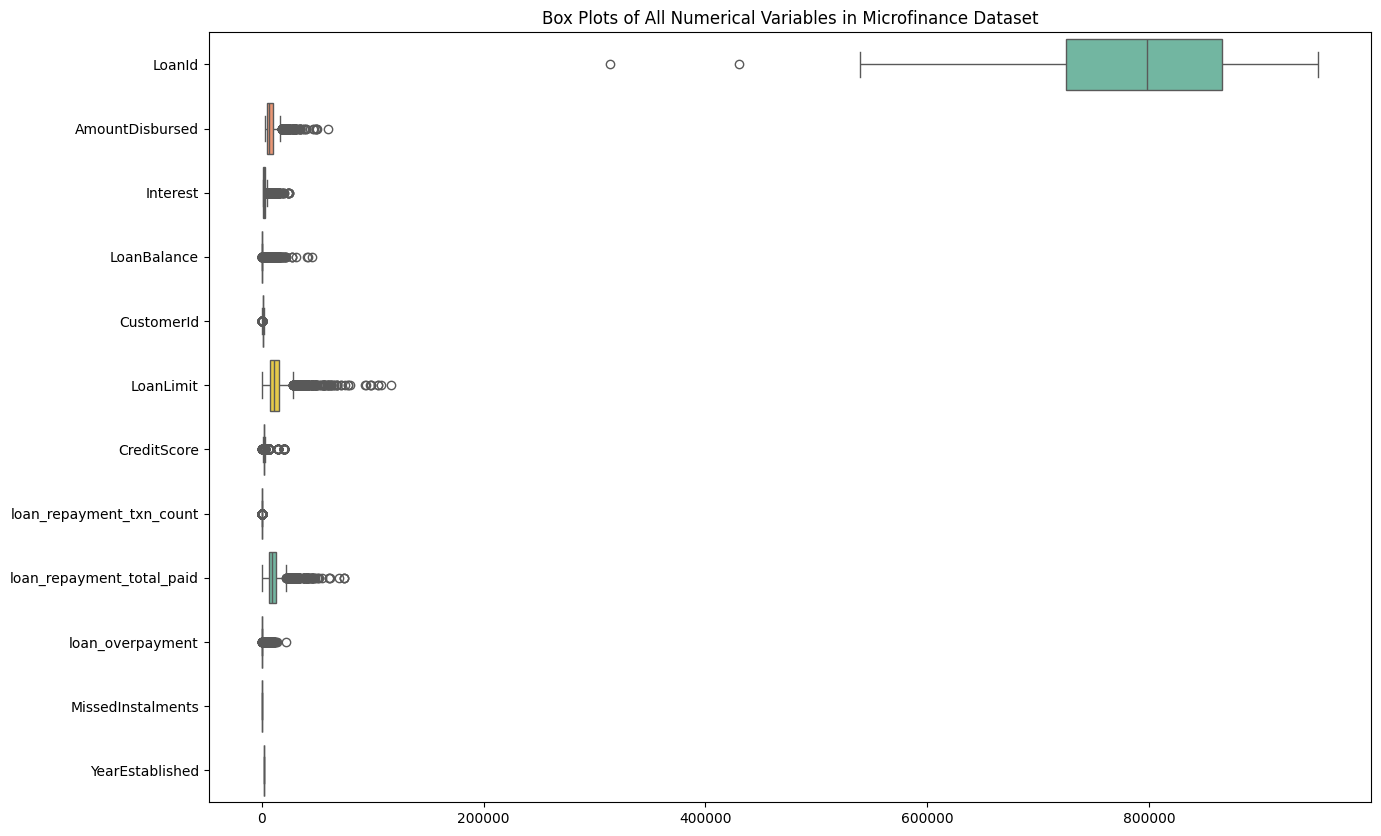

In [71]:
#Outliers for numerical data

numerical_data = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))  

sns.boxplot(data=numerical_data, orient="h", palette="Set2") 

plt.title('Box Plots of All Numerical Variables in Microfinance Dataset')

plt.show()

In [72]:
# Outliers Identification using IQR 

def find_outliers_iqr(data, column):
  """
  Identifies outliers in a DataFrame column using the IQR method.

  Args:
      data: Pandas DataFrame.
      column: Name of the column to check for outliers.

  Returns:
      A Series of boolean values indicating outliers.
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (data[column] < lower_bound) | (data[column] > upper_bound)

# --- Identify outliers in all numerical columns ---

# Select only the numerical columns
numerical_data = df.select_dtypes(include=[np.number])

for column in numerical_data.columns:
    outliers = find_outliers_iqr(df, column)
    print(f"Number of outliers in '{column}': {outliers.sum()}")

Number of outliers in 'LoanId': 2
Number of outliers in 'AmountDisbursed': 157
Number of outliers in 'Interest': 374
Number of outliers in 'LoanBalance': 417
Number of outliers in 'CustomerId': 99
Number of outliers in 'LoanLimit': 235
Number of outliers in 'CreditScore': 230
Number of outliers in 'loan_repayment_txn_count': 239
Number of outliers in 'loan_repayment_total_paid': 194
Number of outliers in 'loan_overpayment': 162
Number of outliers in 'MissedInstalments': 0
Number of outliers in 'YearEstablished': 0


Treatment: Decide whether to remove, transform, or keep outliers based on their nature and the analysis goals.

**Features with outliers to deal with:**
- AmountDisbursed (capping)
- LoanBalance
- loan_repayment_total_paid
- LoanLimit (remove 0), anything below loan limit < 1000
- Product Type (remove 12 WEEKS - SME 1 & 2)

#### a. AmountDisbursed

In [73]:
#Defining outlier's range for (AmountDisbursed)
Q1 = df['AmountDisbursed'].quantile(0.25)
Q3 = df['AmountDisbursed'].quantile(0.75)
IQR = Q3 - Q1
#Any value outside (lower_bound) & (upper_bound) is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ad_outliers= df[(df['AmountDisbursed'] < lower_bound) | (df['AmountDisbursed'] > upper_bound)]

#How many times each outlier value appears
ad_outliers['AmountDisbursed'].value_counts()

AmountDisbursed
20000    48
30000    20
18000    16
25000    14
22000     9
23000     8
35000     5
27000     5
19000     4
21000     4
28000     4
49000     3
40000     2
32000     2
26000     2
38000     2
36000     1
50000     1
24000     1
47000     1
60000     1
31000     1
46000     1
34000     1
29000     1
Name: count, dtype: int64

In [74]:
# (Create a copy of the data to avoid modifying the original)
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[~outliers]

In [75]:
# (Create another copy for this method)
df_capped = df.copy()
upper_cap = df['AmountDisbursed'].quantile(0.95)  # Cap at 95th percentile 

df_capped['AmountDisbursed'] = np.where(
    df_capped['AmountDisbursed'] > upper_cap,
    upper_cap,
    df_capped['AmountDisbursed'])

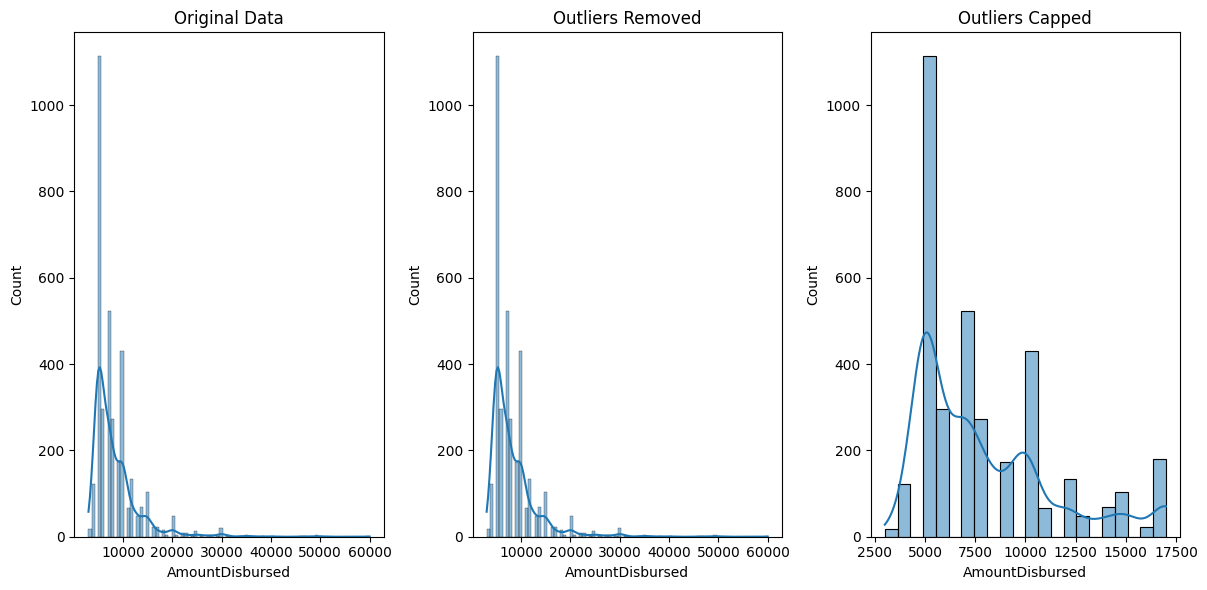

In [76]:
# Visualize results 

plt.figure(figsize=(12, 6))

#Plot1. Orignial Data
plt.subplot(1, 3, 1)
sns.histplot(df['AmountDisbursed'], kde=True)
plt.title('Original Data')

#Plot2. Outliers Removed
plt.subplot(1, 3, 2)
sns.histplot(df_no_outliers["AmountDisbursed"], kde=True)
plt.title('Outliers Removed')

#Plot2. Outliers Capped
plt.subplot(1, 3, 3)
sns.histplot(df_capped["AmountDisbursed"], kde=True)
plt.title('Outliers Capped')

plt.tight_layout()
plt.show()

#### b. loan_repayment_total_paid

In [77]:
df['loan_repayment_total_paid'].describe()

count     3572.000000
mean     10400.055991
std       7088.355892
min         13.000000
25%       6500.000000
50%       9000.000000
75%      12750.000000
max      74000.000000
Name: loan_repayment_total_paid, dtype: float64

**Observations:**
- Strong right skew → mean (10,400) > median (9,000)
- Very large max (74,000) compared to Q3 (12,750)
- Low repayment values (e.g., 35) were retained as they represent valid customer behavior. A log transformation was applied to reduce skewness and stabilize variance across the distribution

**Way forward:** 
- EDA/Reporting → use original column 
- Modeling → use log version

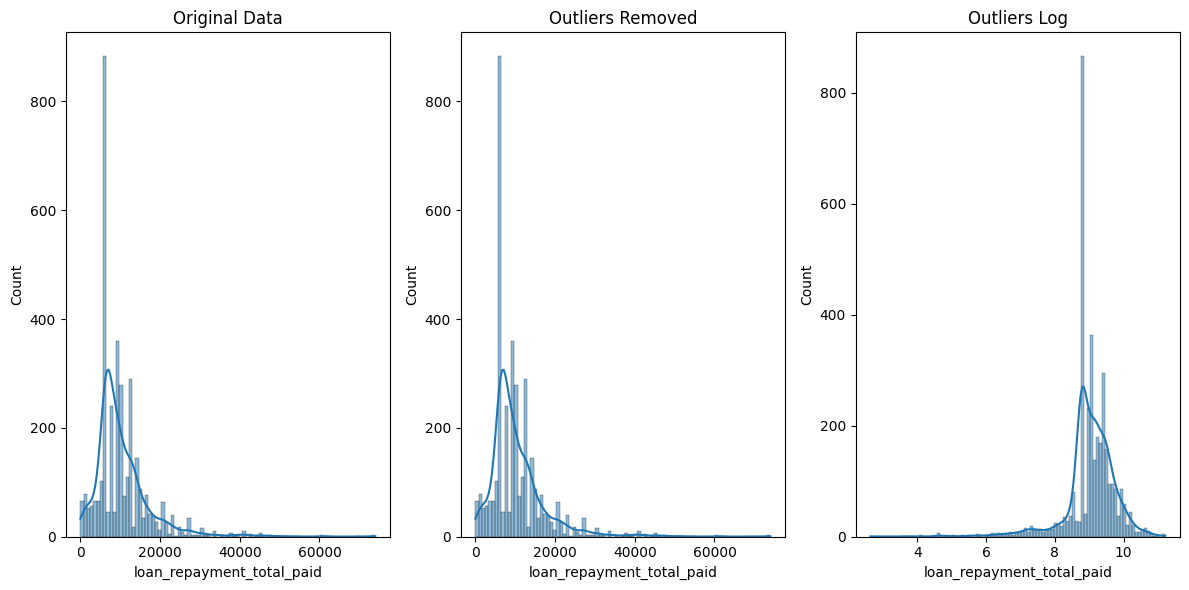

In [78]:
#log transformation
df_log = df.copy()
df_log['loan_repayment_total_paid'] = np.log1p(
    df_log['loan_repayment_total_paid']
)

# Visualize results 

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['loan_repayment_total_paid'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(df_no_outliers["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Removed')

plt.subplot(1, 3, 3)
sns.histplot(df_log["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Log')

plt.tight_layout()

In [79]:
df_log['loan_repayment_total_paid'].describe()

count    3572.000000
mean        9.032843
std         0.754597
min         2.639057
25%         8.779711
50%         9.105091
75%         9.453365
max        11.211834
Name: loan_repayment_total_paid, dtype: float64

#### c. LoanLimit

In [80]:
df['LoanLimit'].describe()

count      3572.000000
mean      13788.437850
std       10376.976115
min           0.000000
25%        8000.000000
50%       11000.000000
75%       16000.000000
max      117000.000000
Name: LoanLimit, dtype: float64

**Industry Insights:** 
- A customer with **LoanLimit = 0** cannot receive a loan, so this value does not represent an actual lending capacity.Therefore, zero values were treated as missing and handled accordingly.
- Loan limits below 1,000 were reviewed against business rules and treated as invalid observations accordingly. 

**Observations:** 
- 0 is extremely far from the rest of the distribution. 
- Anything < 1,000 is far outside the normal range (likely the same issue as 0), Q1 = 8000

**Way forward:** 
- drop 0 & <1000 values

In [81]:
# Mark invalid values as missing 
df['LoanLimit'] = df['LoanLimit'].replace(0, np.nan)
df.loc[df['LoanLimit'] < 1000, 'LoanLimit'] = np.nan

# Drop missing values
df = df.dropna(subset=['LoanLimit'])

# Reset index
df = df.reset_index(drop=True)

#### d. Product

In [82]:
df['Product'].value_counts()

Product
5 weeks credit ease     2580
7 weeks credit ease      701
10 weeks credit ease     186
12 weeks credit ease       3
sme - 3 months             1
sme - 4 months             1
Name: count, dtype: Int64

In [83]:
# Remove SME - 3 MONTHS and SME - 6 MONTHS products as they have very few samples
df = df[~df['Product'].isin(['SME - 3 MONTHS', 'SME - 6 MONTHS'])].copy()

#### e. LoanBalance

- maybe just keep the same and do feature engineering later

In [84]:
df['LoanBalance'].value_counts()

LoanBalance
0.00        3064
7500.00        8
5250.00        7
4200.00        6
4650.00        6
            ... 
16692.86       1
6115.00        1
350.00         1
6552.00        1
3777.01        1
Name: count, Length: 300, dtype: int64

In [ ]:
#Defining outliers for (LoanBalance)
Q1 = df['LoanBalance'].quantile(0.25)
Q3 = df['LoanBalance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_LoanBalance= df[(df['LoanBalance'] < lower_bound) | (df['LoanBalance'] > upper_bound)]

#How many times each outlier value appears
outliers_LoanBalance['LoanBalance'].value_counts()

LoanBalance
7500.00     8
5250.00     7
3900.00     6
4200.00     6
4650.00     6
           ..
16692.86    1
6115.00     1
350.00      1
6552.00     1
3777.01     1
Name: count, Length: 299, dtype: int64

# Save new dataset

In [86]:
df.to_csv('cleaned_dataset.csv', index=False)

In [87]:
df['LoanBalance'].describe()

count     3472.000000
mean       756.391593
std       2892.413829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45500.000000
Name: LoanBalance, dtype: float64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        3472 non-null   int64         
 1   AmountDisbursed               3472 non-null   int64         
 2   Interest                      3472 non-null   int64         
 3   LoanBalance                   3472 non-null   float64       
 4   BorrowDate                    3472 non-null   datetime64[ns]
 5   Product                       3472 non-null   string        
 6   Branch                        3472 non-null   string        
 7   ClearDate                     3472 non-null   datetime64[ns]
 8   CustomerId                    3472 non-null   int64         
 9   Gender                        3472 non-null   string        
 10  LoanLimit                     3472 non-null   float64       
 11  CreditScore                   

In [89]:
df.shape

#original: (3572, 21)
#new: (3472, 21)

(3472, 21)